In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df_11 = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\icaller_data_Long\\icaller_data_new.csv")
del df_11['phone']
df_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8150 entries, 0 to 8149
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   call_to               8150 non-null   float64
 1   call_in               8150 non-null   float64
 2   call_to_miss          8150 non-null   float64
 3   call_in_miss          8150 non-null   float64
 4   duration_call_to      8150 non-null   float64
 5   duration_call_in      8150 non-null   float64
 6   avg_duration_call_to  8150 non-null   float64
 7   avg_duration_call_in  8150 non-null   float64
 8   avg_in_contact        8150 non-null   float64
 9   in_hour               8150 non-null   int64  
 10  avg_success           8150 non-null   float64
 11  Spam                  8150 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 764.2 KB


In [3]:
df_11.groupby(['Spam']).count()

,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success
Spam,,,,,,,,,,,
0,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
1,4150,4150,4150,4150,4150,4150,4150,4150,4150,4150,4150


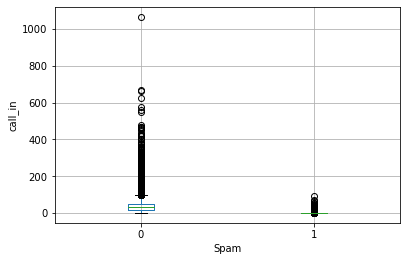

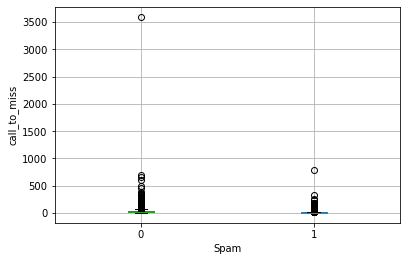

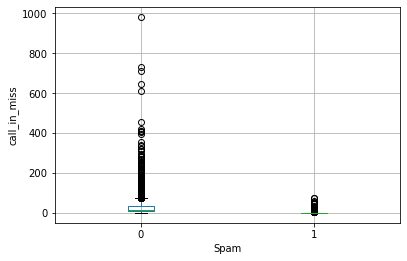

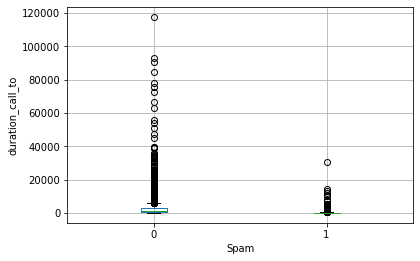

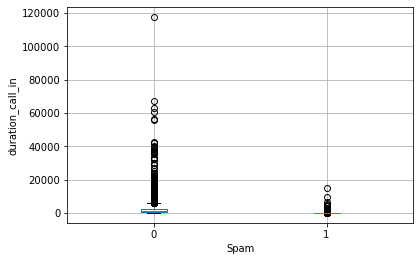

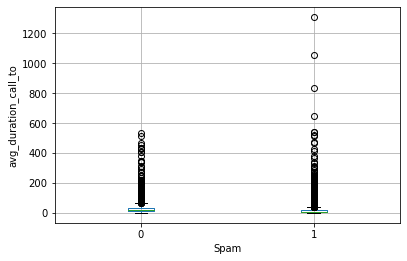

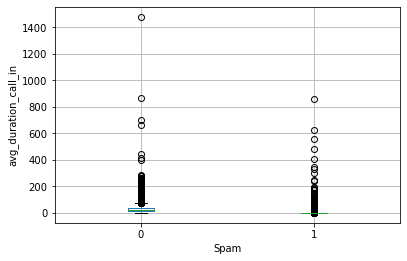

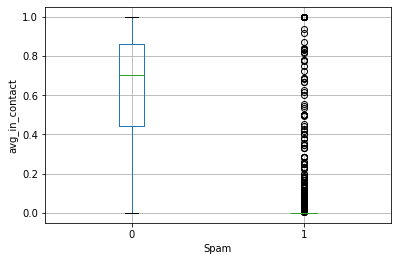

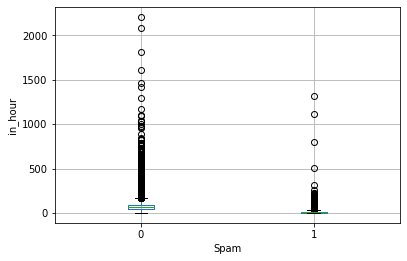

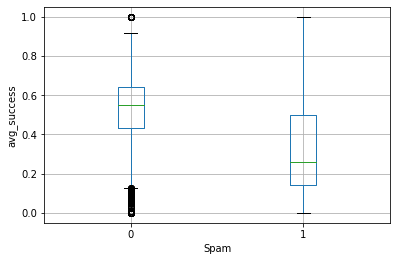

In [4]:
col= df_11.columns.tolist()[1:-1]
for i in range(0 , len(col)) :
    ax = df_11.boxplot(column= col[i], by='Spam')
    ax.set_ylabel(col[i])
    plt.suptitle('') # Suppress the titles
    plt.title('')
    plt.savefig(col[i]+'.png')

# Normal

In [5]:
for feature in df_11.columns[1:-1]:
    df_11[feature]=df_11[feature].apply(np.log1p)

In [6]:
df_11.groupby(['Spam']).count()

,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success
Spam,,,,,,,,,,,
0,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000,4000
1,4150,4150,4150,4150,4150,4150,4150,4150,4150,4150,4150


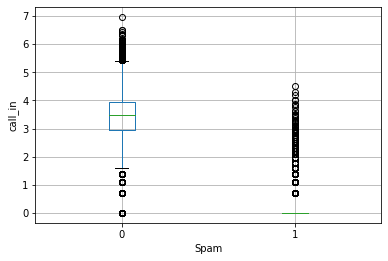

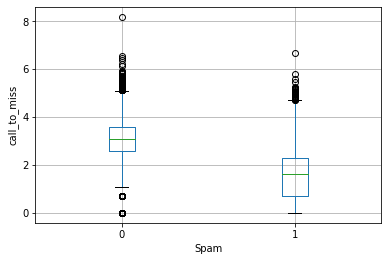

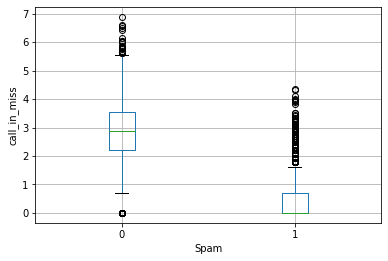

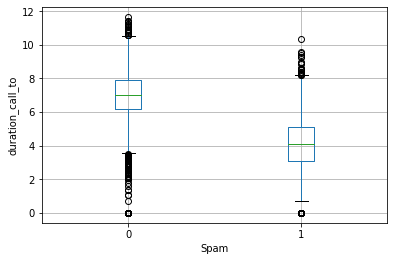

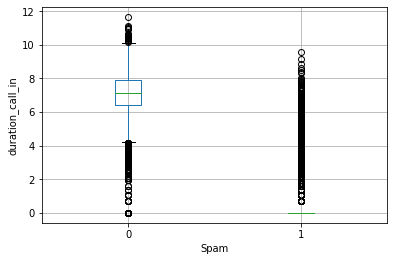

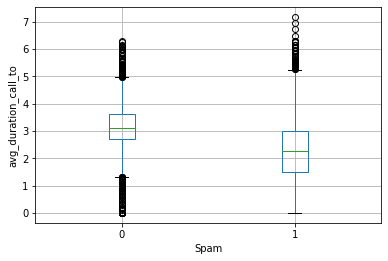

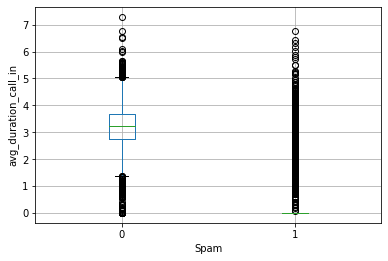

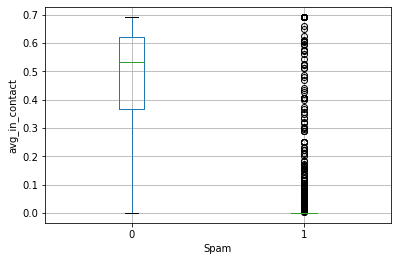

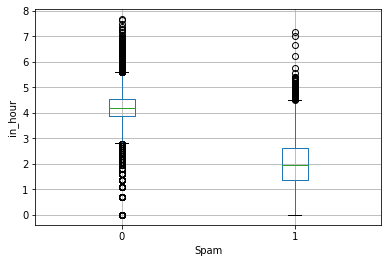

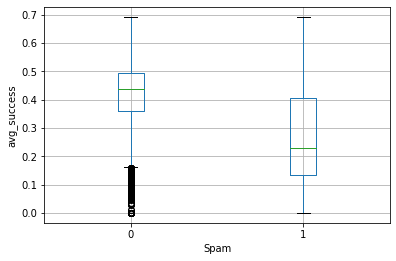

In [7]:
col= df_11.columns.tolist()[1:-1]
for i in range(0 , len(col)) :
    ax = df_11.boxplot(column= col[i], by='Spam')
    ax.set_ylabel(col[i])
    plt.suptitle('') # Suppress the titles
    plt.title('')
    plt.savefig(col[i]+'.png')

In [8]:
df_11 = df_11.drop(df_11.loc[((df_11.Spam==1)&(df_11.call_to==0))].index)

# Split data

In [9]:
from sklearn.model_selection import train_test_split
X = df_11.drop(columns=['Spam'])
Y = df_11['Spam']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,  random_state=3)
print(X_train.shape, y_train.shape)

(5705, 11) (5705,)


In [10]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def KQ(y_test,prediction_train,prediction_test):
    print('Accuracy_train:', accuracy_score(y_train, prediction_train))
    print('Accuracy_test:', accuracy_score(y_test, prediction_test))
    print('F1 score:', f1_score(y_test, prediction_test))
    print('Recall:', recall_score(y_test, prediction_test))
    print('Precision:', precision_score(y_test, prediction_test))
   # print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction_test))
# print(len(df_non))
Score = []
#LogisticRegression
print('-------------------------------------LogisticRegression----------------------------------------------------------')
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
prediction_train = logit_reg.predict(X_train)
prediction_test = logit_reg.predict(X_test)
Score.append(accuracy_score(y_test, prediction_test))
KQ(y_test,prediction_train,prediction_test)

#KNN
print('-------------------------------------KNN----------------------------------------------------------')
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10,  weights = 'distance')
knn.fit(X_train, y_train)
prediction_train = knn.predict(X_train)
prediction_test = knn.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score.append(accuracy_score(y_test, prediction_test))

#Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
print('-------------------------------------Naive_bayes----------------------------------------------------------')
NB = MultinomialNB()
NB.fit(X_train, y_train)
prediction_train = NB.predict(X_train)
prediction_test =NB.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score.append(accuracy_score(y_test, prediction_test))

# DecisionTree
from sklearn.tree import DecisionTreeClassifier
print('-------------------------------------DecisionTree----------------------------------------------------------')
DT = DecisionTreeClassifier(random_state=1, max_depth = 1)
DT.fit(X_train, y_train)
prediction_train = DT.predict(X_train)
prediction_test =DT.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score.append(accuracy_score(y_test, prediction_test))

#RandomForestClassifier
print('-------------------------------------RandomForestClassifier----------------------------------------------------------')
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500, random_state=1)
RF.fit(X_train, y_train)
prediction_train = RF.predict(X_train)
prediction_test =RF.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score.append(accuracy_score(y_test, prediction_test))
# prediction_non_RF = logit_reg.predict(X_non)
# print('prediction_non',prediction_non_RF)

#Bootstrap Aggregation aka Bagging
print('-------------------------------------Bagging----------------------------------------------------------')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)
prediction_train = bagging.predict(X_train)
prediction_test =bagging.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score.append(accuracy_score(y_test, prediction_test))

# AdaBoost boosting
print('-------------------------------------Boosting----------------------------------------------------------')
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)
prediction_train = boost.predict(X_train)
prediction_test =boost.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score.append(accuracy_score(y_test, prediction_test))

# XGBClassifier
print('-------------------------------------XGBClassifier----------------------------------------------------------')
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)
prediction_train = XGB.predict(X_train)
prediction_test =XGB.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score.append(accuracy_score(y_test, prediction_test))
# prediction_non_XGB = logit_reg.predict(X_non)
# print('prediction_non',prediction_non_XGB)




-------------------------------------LogisticRegression----------------------------------------------------------
Accuracy_train: 0.9486415425065732
Accuracy_test: 0.9411042944785276
F1 score: 0.942261427425822
Recall: 0.9468170829975826
Precision: 0.9377494014365523

 confussion matrix:
 [[1126   78]
 [  66 1175]]
-------------------------------------KNN----------------------------------------------------------
Accuracy_train: 1.0
Accuracy_test: 0.947239263803681
F1 score: 0.9476248477466505
Recall: 0.9403706688154714
Precision: 0.9549918166939444

 confussion matrix:
 [[1149   55]
 [  74 1167]]
-------------------------------------Naive_bayes----------------------------------------------------------
Accuracy_train: 0.9202453987730062
Accuracy_test: 0.9169734151329243
F1 score: 0.9158025715470758
Recall: 0.8896051571313457
Precision: 0.9435897435897436

 confussion matrix:
 [[1138   66]
 [ 137 1104]]
-------------------------------------DecisionTree------------------------------------

In [11]:
classifiers_name = ['logit_reg', 'knn', 'NB', 'DT', 'RF', 'bagging', 'boost', 'XGB' ]

s = {'classifiers_name' : classifiers_name, 'Score' : Score}
Score_before = pd.DataFrame(s)

In [12]:
Score_before

,classifiers_name,Score
0,logit_reg,0.941104
1,knn,0.947239
2,NB,0.916973
3,DT,0.932106
4,RF,0.963190
5,bagging,0.962781
6,boost,0.952556
7,XGB,0.968507


# Clean outlier

In [13]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train[mask], y_train[mask]

In [14]:
print(X_train.shape, y_train.shape)

(5134, 11) (5134,)


# Non_label for test

In [15]:
df_non = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\icaller_data_Long\\not_label_new.csv")
# del df_11['phone']
#normal df_non
# for feature in df_non.columns[:-1]:
#     df_non[feature]=df_non[feature].apply(np.log1p)
    
#split df_non
X_non = df_non.drop(columns=['Spam'])
for feature in df_11.columns[:-1]:
    df_11[feature]=df_11[feature].apply(np.log1p)

In [16]:
X_train

,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success
6564,18.0,3.688879,2.772589,3.218876,6.522093,7.403061,3.071567,3.297010,0.303186,4.234107,0.452932
3078,1.0,0.000000,1.609438,0.000000,2.079442,0.000000,0.875457,0.000000,0.000000,1.791759,0.182322
3900,1.0,0.000000,0.000000,0.000000,4.317488,0.000000,4.317389,0.000000,0.000000,0.000000,0.693147
2379,7.0,0.000000,0.693147,0.000000,4.532599,0.000000,2.525717,0.000000,0.000000,1.609438,0.559616
3386,6.0,0.000000,0.000000,0.000000,4.976734,0.000000,3.218860,0.000000,0.000000,1.609438,0.510826
...,...,...,...,...,...,...,...,...,...,...,...
7096,21.0,3.583519,3.044522,2.639057,5.693732,6.586172,2.106509,2.777782,0.548316,4.043051,0.460124
1667,7.0,0.000000,1.791759,0.000000,3.178054,0.000000,1.070436,0.000000,0.000000,1.945910,0.080043
3321,1.0,0.000000,0.000000,0.000000,2.833213,0.000000,2.833119,0.000000,0.000000,0.693147,0.693147
1688,1.0,0.000000,0.000000,0.693147,4.248495,0.000000,4.248397,0.000000,0.000000,1.098612,0.405465


In [17]:
X_test

,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success
1352,2.0,0.000000,2.197225,0.000000,4.007333,0.000000,1.856290,0.000000,0.000000,1.609438,0.095310
6103,22.0,3.332205,1.791759,3.178054,6.841615,6.842683,3.573174,2.981631,0.492476,3.583519,0.468379
4560,5.0,1.098612,0.000000,1.945910,4.744932,3.871201,3.169666,1.927881,0.653926,2.564949,0.379490
6422,27.0,3.401197,3.295837,2.708050,6.979145,6.858565,3.056133,3.140535,0.439598,3.891820,0.452932
1680,2.0,0.000000,1.791759,0.000000,3.178054,0.000000,1.455276,0.000000,0.000000,1.945910,0.251314
...,...,...,...,...,...,...,...,...,...,...,...
2625,3.0,0.000000,1.098612,0.000000,4.882802,0.000000,3.303198,0.000000,0.336472,1.609438,0.470004
838,1.0,0.000000,2.302585,0.693147,2.708050,0.000000,0.875463,0.000000,0.000000,2.397895,0.087011
1476,12.0,0.000000,2.995732,1.609438,5.075174,0.000000,1.813034,0.000000,0.000000,3.433987,0.108214
3521,2.0,0.000000,1.098612,0.000000,3.496508,0.000000,2.197202,0.000000,0.000000,1.609438,0.405465


# Model

In [18]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
def KQ(y_test,prediction_train,prediction_test):
    print('Accuracy_train:', accuracy_score(y_train, prediction_train))
    print('Accuracy_test:', accuracy_score(y_test, prediction_test))
    print('F1 score:', f1_score(y_test, prediction_test))
    print('Recall:', recall_score(y_test, prediction_test))
    print('Precision:', precision_score(y_test, prediction_test))
   # print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n',confusion_matrix(y_test, prediction_test))
# print(len(df_non))
Score_a = []
#LogisticRegression
print('-------------------------------------LogisticRegression----------------------------------------------------------')
from sklearn.linear_model import LogisticRegression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, y_train)
prediction_train = logit_reg.predict(X_train)
prediction_test = logit_reg.predict(X_test)
Score_a.append(accuracy_score(y_test, prediction_test))
KQ(y_test,prediction_train,prediction_test)

#KNN
print('-------------------------------------KNN----------------------------------------------------------')
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10,  weights = 'distance')
knn.fit(X_train, y_train)
prediction_train = knn.predict(X_train)
prediction_test = knn.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))

#Naive Bayes
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
print('-------------------------------------Naive_bayes----------------------------------------------------------')
NB = MultinomialNB()
NB.fit(X_train, y_train)
prediction_train = NB.predict(X_train)
prediction_test =NB.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))

# DecisionTree
from sklearn.tree import DecisionTreeClassifier
print('-------------------------------------DecisionTree----------------------------------------------------------')
DT = DecisionTreeClassifier(random_state=1, max_depth = 1)
DT.fit(X_train, y_train)
prediction_train = DT.predict(X_train)
prediction_test =DT.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))

#RandomForestClassifier
print('-------------------------------------RandomForestClassifier----------------------------------------------------------')
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=500, random_state=1)
RF.fit(X_train, y_train)
prediction_train = RF.predict(X_train)
prediction_test =RF.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))
# prediction_non_RF = logit_reg.predict(X_non)
# print('prediction_non',prediction_non_RF)

#Bootstrap Aggregation aka Bagging
print('-------------------------------------Bagging----------------------------------------------------------')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)
prediction_train = bagging.predict(X_train)
prediction_test =bagging.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))

# AdaBoost boosting
print('-------------------------------------Boosting----------------------------------------------------------')
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), n_estimators=100, random_state=1)
boost.fit(X_train, y_train)
prediction_train = boost.predict(X_train)
prediction_test =boost.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))

# XGBClassifier
print('-------------------------------------XGBClassifier----------------------------------------------------------')
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)
prediction_train = XGB.predict(X_train)
prediction_test =XGB.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))
# prediction_non_XGB = logit_reg.predict(X_non)
# print('prediction_non',prediction_non_XGB)




-------------------------------------LogisticRegression----------------------------------------------------------
Accuracy_train: 0.9694195559018309
Accuracy_test: 0.9353783231083844
F1 score: 0.9372019077901431
Recall: 0.9500402900886382
Precision: 0.9247058823529412

 confussion matrix:
 [[1108   96]
 [  62 1179]]
-------------------------------------KNN----------------------------------------------------------
Accuracy_train: 1.0
Accuracy_test: 0.9263803680981595
F1 score: 0.927652733118971
Recall: 0.9298952457695407
Precision: 0.92542101042502

 confussion matrix:
 [[1111   93]
 [  87 1154]]
-------------------------------------Naive_bayes----------------------------------------------------------
Accuracy_train: 0.9439033891702376
Accuracy_test: 0.914519427402863
F1 score: 0.9104925053533189
Recall: 0.8565672844480258
Precision: 0.9716636197440585

 confussion matrix:
 [[1173   31]
 [ 178 1063]]
-------------------------------------DecisionTree--------------------------------------

In [19]:
classifiers_name = ['logit_reg', 'knn', 'NB', 'DT', 'RF', 'bagging', 'boost', 'XGB' ]

s = {'classifiers_name' : classifiers_name, 'Score' : Score_a}
Score_after = pd.DataFrame(s)

Random (chance) Prediction: AUROC = 0.500
logit_reg
             : AUROC = 0.980
knn
             : AUROC = 0.969
NB
             : AUROC = 0.967
DT
             : AUROC = 0.932
RF
             : AUROC = 0.993
bagging
             : AUROC = 0.991
boost
             : AUROC = 0.943
XGB
             : AUROC = 0.993


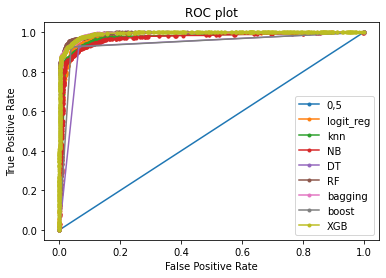

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
classifiers = [logit_reg, knn, NB, DT, RF, bagging, boost, XGB ]
classifiers_name = ['logit_reg', 'knn', 'NB', 'DT', 'RF', 'bagging', 'boost', 'XGB' ]
r_probs = [0 for _ in range(len(y_test))]
r_auc = roc_auc_score(y_test, r_probs)
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs )
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
plt.plot(r_fpr, r_tpr, marker='.', label = '0,5' % (r_auc))
for i in range(len(classifiers_name)):
    i_probs = classifiers[i].predict_proba(X_test)
    i_probs = i_probs[:,1]
    i_auc = roc_auc_score(y_test, i_probs)
    i_fpr, i_tpr, _ = roc_curve(y_test, i_probs )
    print(classifiers_name[i])
    print('             : AUROC = %.3f' % (i_auc))
    plt.plot(i_fpr, i_tpr, marker='.', label = classifiers_name[i] % (i_auc))
plt.title('ROC plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [21]:
Score = pd.concat([Score_before,Score_after],axis = 1)
Score

,classifiers_name,Score,classifiers_name,Score
0,logit_reg,0.941104,logit_reg,0.935378
1,knn,0.947239,knn,0.926380
2,NB,0.916973,NB,0.914519
3,DT,0.932106,DT,0.932106
4,RF,0.963190,RF,0.961554
5,bagging,0.962781,bagging,0.948466
6,boost,0.952556,boost,0.943149
7,XGB,0.968507,XGB,0.952147


# Visualization test with 422k data not label

In [22]:
df_non = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\icaller_data_Long\\not_label_new.csv")
df_non.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422397 entries, 0 to 422396
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   call_to               422397 non-null  int64  
 1   call_in               422397 non-null  int64  
 2   call_to_miss          422397 non-null  int64  
 3   call_in_miss          422397 non-null  int64  
 4   duration_call_to      422397 non-null  float64
 5   duration_call_in      422397 non-null  float64
 6   avg_duration_call_to  422397 non-null  float64
 7   avg_duration_call_in  422397 non-null  float64
 8   avg_in_contact        422397 non-null  float64
 9   in_hour               422397 non-null  int64  
 10  avg_success           422397 non-null  float64
 11  Spam                  422397 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 38.7 MB


In [23]:
for feature in df_non.columns[:-1]:
    df_non[feature]=df_non[feature].apply(np.log1p)

In [24]:
X_non =  df_non.drop(columns=['Spam'])

In [25]:
# XGBClassifier
print('-------------------------------------XGBClassifier----------------------------------------------------------')
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)
prediction_train = XGB.predict(X_train)
prediction_test =XGB.predict(X_test)
KQ(y_test,prediction_train,prediction_test)
Score_a.append(accuracy_score(y_test, prediction_test))
# prediction_non_XGB = logit_reg.predict(X_non)
# print('prediction_non',prediction_non_XGB)

-------------------------------------XGBClassifier----------------------------------------------------------
Accuracy_train: 0.9883132060771328
Accuracy_test: 0.9521472392638037
F1 score: 0.9532934131736527
Recall: 0.9621273166800967
Precision: 0.944620253164557

 confussion matrix:
 [[1134   70]
 [  47 1194]]


In [26]:
prediction_non_XGB = XGB.predict(X_non)

In [27]:
Test = X_non
Test['Spam'] = prediction_non_XGB

In [28]:
Test.groupby(['Spam']).count()

,call_to,call_in,call_to_miss,call_in_miss,duration_call_to,duration_call_in,avg_duration_call_to,avg_duration_call_in,avg_in_contact,in_hour,avg_success
Spam,,,,,,,,,,,
0,14343,14343,14343,14343,14343,14343,14343,14343,14343,14343,14343
1,408054,408054,408054,408054,408054,408054,408054,408054,408054,408054,408054


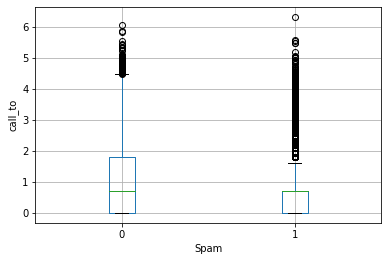

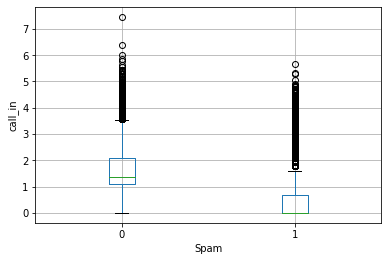

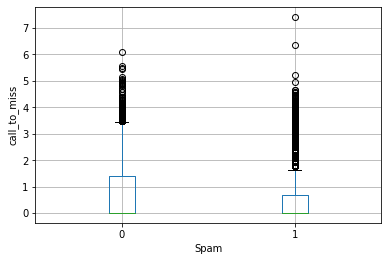

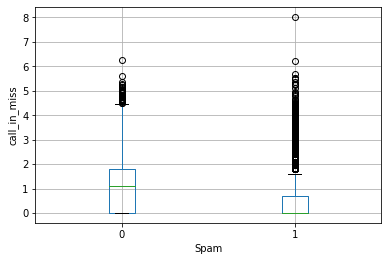

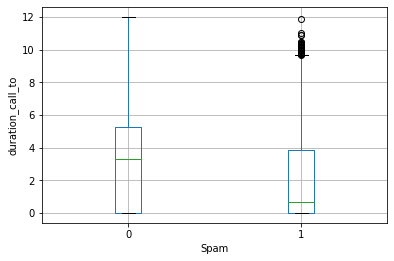

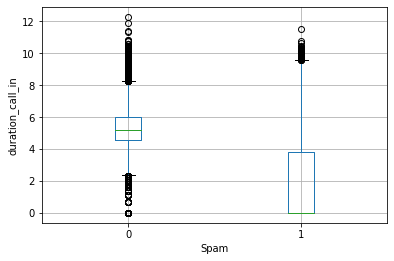

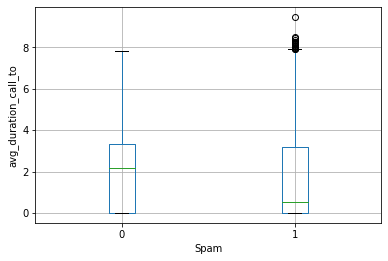

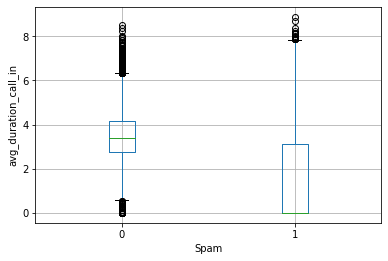

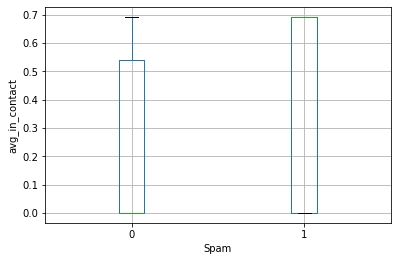

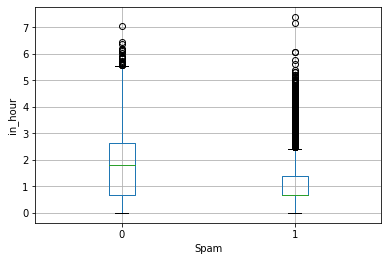

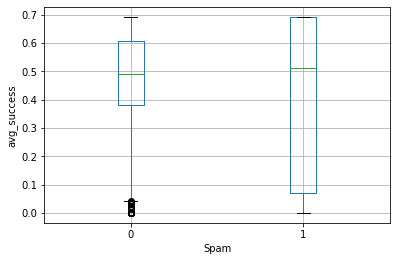

In [30]:
col= Test.columns.tolist()[:-1]
for i in range(0 , len(col)) :
    ax = Test.boxplot(column= col[i], by='Spam')
    ax.set_ylabel(col[i])
    plt.suptitle('') # Suppress the titles
    plt.title('')
#     ax.savefig((col[i]+' boxplot.png'))

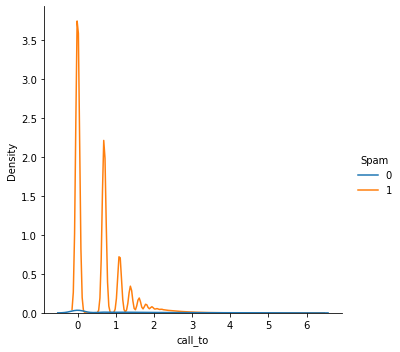

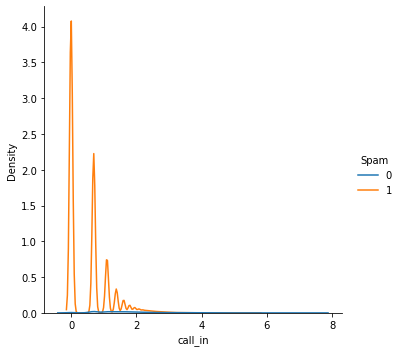

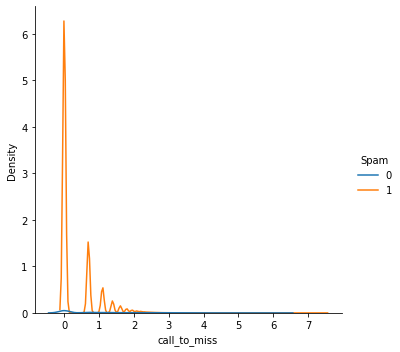

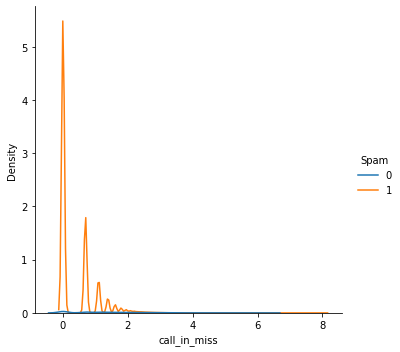

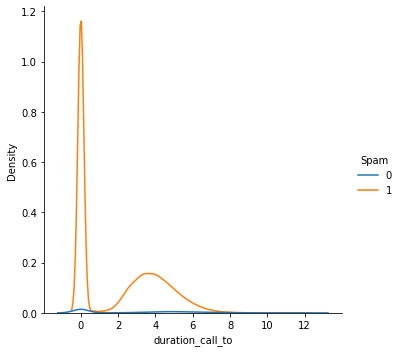

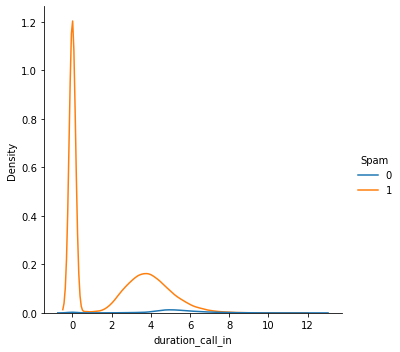

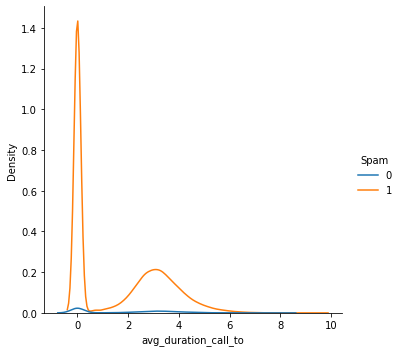

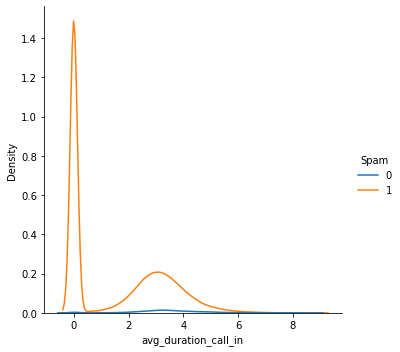

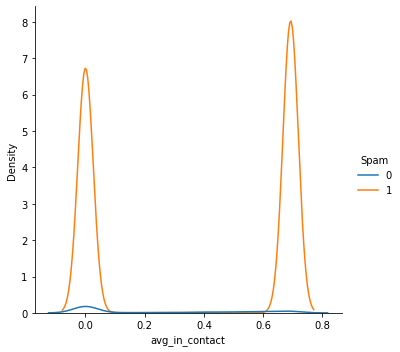

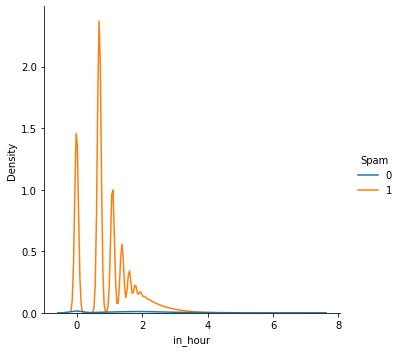

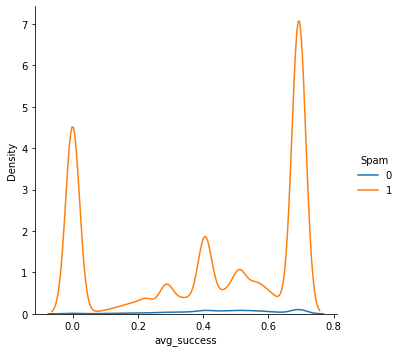

In [33]:
for i in col :
    a = sns.displot(Test, x=i ,hue='Spam', kind="kde")
#     a.savefig(col[i]+' density.png')
        

In [34]:
sns_plot_2class = sns.pairplot(Test, vars=df_non.columns[1:-1], hue="Spam")
sns_plot_2class.savefig("spam_2class.png")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001A60EB76CA8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
print(col)

# OverSampling 

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
from imblearn.over_sampling import SVMSMOTE, SMOTE

# oversample = SVMSMOTE(m_neighbors=20,k_neighbors=20)
oversample = SMOTE(k_neighbors=20)
X_train, y_train = oversample.fit_resample(X_train, y_train)
# t=Xt
# t['Spam']=yt
print(X_train.shape, y_train.shape)

# K-fold

In [ ]:
from sklearn.model_selection import KFold
#Implementing cross validation
k = 10
kf = KFold(n_splits=k, random_state=None) 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = Y[train_index] , Y[test_index]
     
    XGB.fit(X_train,y_train)
    pred_values = XGB.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

# So sánh spam,notspam sau khi test với spam,notspam đã gán nhãn

In [ ]:
df_non_spam = Test.loc[Test.Spam == 1]
df_non_spam['data'] = 0
df_non_notspam = Test.loc[Test.Spam == 0]

In [ ]:
df_non_spam

In [ ]:
df_11_spam = df_11.loc[df_11.Spam == 1]
df_11_spam['data'] = 1
df_11_notspam = df_11.loc[df_11.Spam == 0]

In [ ]:
df_sosanh_spam = pd.concat([df_non_spam,df_11_spam],axis=0)

In [ ]:
df_sosanh_spam

In [ ]:
col= df_sosanh_spam.columns.tolist()[:-2]
for i in range(0 , len(col)) :
    ax = df_sosanh_spam.boxplot(column= col[i], by='data')
    ax.set_ylabel(col[i])
    plt.suptitle('') # Suppress the titles
    plt.title('')
#     plt.savefig(col[i]+'.png')

In [ ]:
df_sosanh_spam.describe()

-------------------------------------DecisionTree----------------------------------------------------------
Accuracy_train: 0.9791585508375535
Accuracy_test: 0.9525562372188139
F1 score: 0.9526143790849673
Recall: 0.9395648670427075
Precision: 0.9660314830157415

 confussion matrix:
 [[1163   41]
 [  75 1166]]


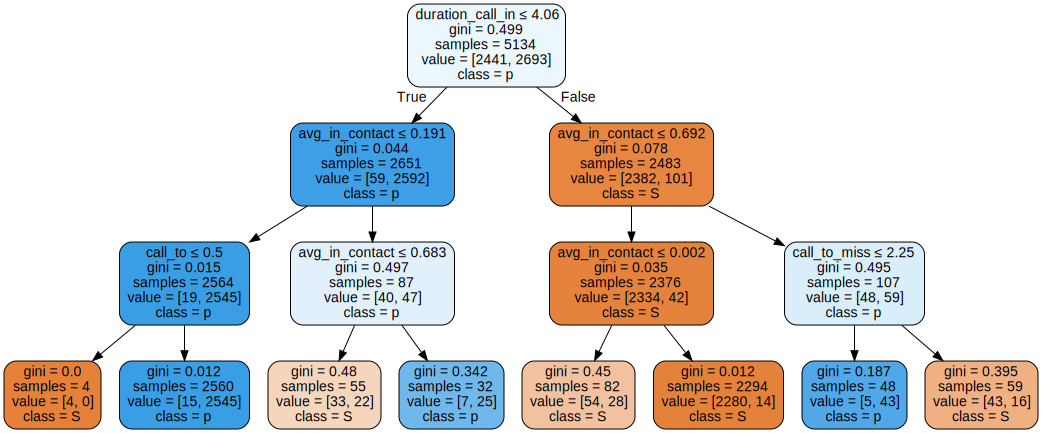

In [35]:
from sklearn.tree import DecisionTreeClassifier
print('-------------------------------------DecisionTree----------------------------------------------------------')
DT = DecisionTreeClassifier(random_state=1, max_depth = 3)
DT.fit(X_train, y_train)
prediction_train = DT.predict(X_train)
prediction_test =DT.predict(X_test)
KQ(y_test,prediction_train,prediction_test)

import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(DT,out_file=None, feature_names = col, class_names = 'Spam', filled = True, rounded = True, special_characters=True)
graph=graphviz.Source(dot_data)
graph


# CỤM

In [ ]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=0).fit(df_11)

In [ ]:
# # Cluster membership
# memb = pd.Series(kmeans.labels_, index=df_11.index)
# # for key, item in memb.groupby(memb):
# #     print(key, ': ', ','.join(item.index))


# centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_11.columns)
# pd.set_option('precision', 3)
# centroids


In [ ]:
# inertia = []
# for n_clusters in range(1, 6):
#     kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_11)
#     inertia.append(kmeans.inertia_ / n_clusters)
# d = {'n_clusters' : range(1, 6), 'inertia': inertia}
# inertias = pd.DataFrame(data = d)
# ax = inertias.plot(x='n_clusters', y='inertia')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Average Within-Cluster Squared Distances')
# plt.ylim((0, 1.1 * inertias.inertia.max()))
# ax.legend().set_visible(False)
# plt.show()

In [ ]:
# df_clustering = df_11

In [ ]:
# df_clustering['cl'] = memb

In [ ]:
# col= df_clustering.columns.tolist()[:-2]
# for i in range(0 , len(col)) :
#     ax = df_clustering.boxplot(column= col[i], by='cl')
#     ax.set_ylabel(col[i])
#     plt.suptitle('') # Suppress the titles
#     plt.title('')
# #     plt.savefig(col[i]+'.png')

In [ ]:
# df_clustering

In [ ]:
# df_clustering.groupby(['Spam','cl']).count()

In [ ]:
# df_clustering

In [ ]:
# tam = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\Spam Calls SPIT\\icaller-data\\icaller_data_Long\\member_new.csv")
# tam

In [ ]:
# tam = tam.sample(4000)

In [ ]:
# tam